In [1]:
import qiskit
import qc_grader
print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.0
Grader version: 0.22.12


In [40]:
from qiskit_ibm_runtime import QiskitRuntimeService


service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'account-name': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': '7p9bCdqlSo3nlp2FNDPGJjpLC78wxy_JJDHyzzV_dwCe',
  'instance': 'crn:v1:bluemix:public:quantum-computing:eu-de:a/624a449c58db4cebbbcd6d44cd96889e:84f0afd8-a97d-449f-ade8-8c52ea820862::',
  'verify': True,
  'private_endpoint': False},
 'default-ibm-quantum': {'channel': 'ibm_quantum',
  'url': 'https://auth.quantum.ibm.com/api',
  'token': '7p9bCdqlSo3nlp2FNDPGJjpLC78wxy_JJDHyzzV_dwCe',
  'verify': True,
  'private_endpoint': False},
 'default-ibm-quantum-platform': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': '7p9bCdqlSo3nlp2FNDPGJjpLC78wxy_JJDHyzzV_dwCe',
  'instance': 'crn:v1:bluemix:public:quantum-computing:eu-de:a/624a449c58db4cebbbcd6d44cd96889e:84f0afd8-a97d-449f-ade8-8c52ea820862::',
  'verify': True,
  'private_endpoint': False},
 'my-quantum-account': {'channel': 'ibm_quantum',
  'url': 'https://auth.quantum.ibm.com/api',
  'token': 'c48268e836ab

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import (
    grade_lab1_ex1_1, 
    grade_lab1_ex1_2, 
    grade_lab1_ex1_3, 
    grade_lab1_ex1_4, 
    grade_lab1_ex2, 
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6
)

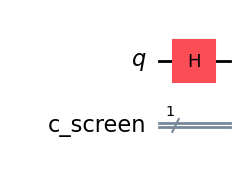

In [33]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit = QuantumCircuit(qr, cr)
# your code here

double_slit.h(qr[0])
#double_slit.measure(qr[0], cr[0])

# end of your code
double_slit.draw('mpl')

In [9]:
grade_lab1_ex1_1(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


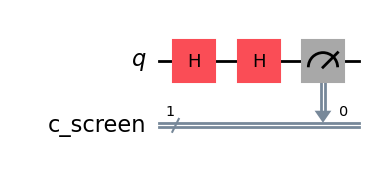

In [34]:
double_slit.h(qr[0])
double_slit.measure(qr[0], cr[0])
double_slit.draw('mpl')

In [15]:
grade_lab1_ex1_2(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


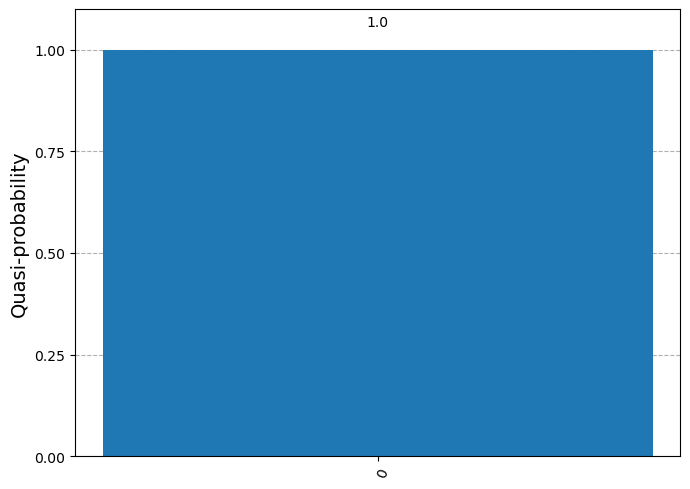

In [41]:
backend = AerSimulator()

# make quantum circuit compatible to the backend
pm = generate_preset_pass_manager(backend = backend, optimization_level=3)
qc_isa = pm.run(double_slit)

# run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots = 1000).result()[0].data.c_screen.get_counts()

plot_distribution(counts)

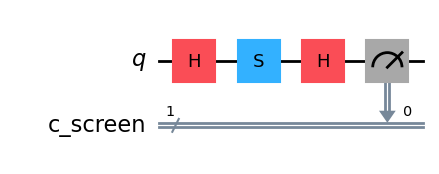

In [18]:
qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_with_difference = QuantumCircuit(qr, cr)
double_slit_with_difference.h(0)

#your code here

double_slit_with_difference.s(0)

#end of your code

double_slit_with_difference.h(0)
double_slit_with_difference.measure(qr, cr)
double_slit_with_difference.draw('mpl')

In [19]:
grade_lab1_ex1_3(double_slit_with_difference)


Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


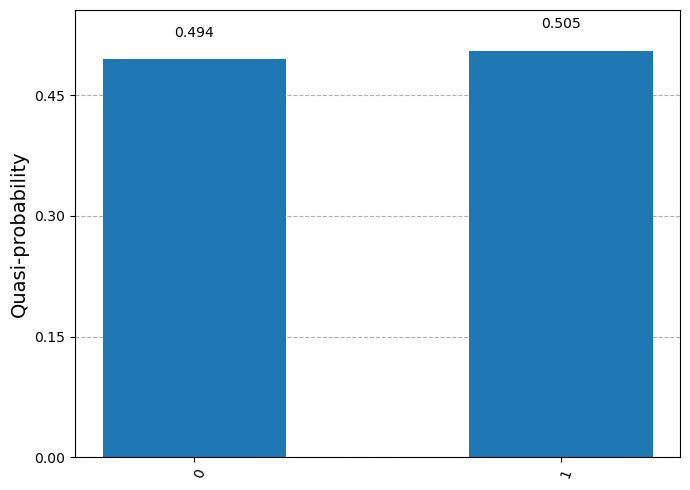

In [20]:
qc_isa = pm.run(double_slit_with_difference)

#run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots=10000).result()[0].data.c_screen.get_counts()
plot_distribution(counts)

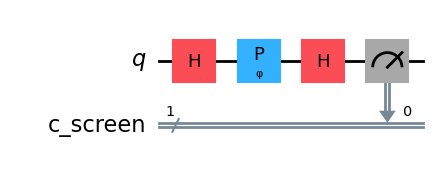

In [24]:
φ = Parameter('φ')

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_fringe = QuantumCircuit(qr, cr)

#your code here

double_slit_fringe.h(0)
double_slit_fringe.p(φ, 0)
double_slit_fringe.h(0)

double_slit_fringe.assign_parameters({φ: np.pi/2})
double_slit_fringe.measure(qr[0], cr[0])

#end of your code

double_slit_fringe.draw('mpl')


In [25]:
grade_lab1_ex1_4(double_slit_fringe)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


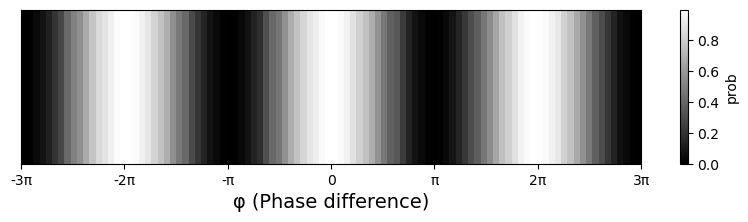

In [26]:
φ_lst = np.linspace(-3*np.pi, 3*np.pi, 100)
qc_isa = pm.run(double_slit_fringe)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

#plot heat map
φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1])

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])  
plt.show()

In [46]:
def schrodingers_cat_experiment_theta(theta):
    
    qc = QuantumCircuit(1)

    #your code start here

    qc.rx(theta, 0)
    
    #end of your code

    qc.measure_all()
    
    backend = AerSimulator()
    pm = generate_preset_pass_manager( backend = backend, optimization_level=3)
    qc_isa = pm.run(qc)

    # Circuit compile and run, shot = 1 
    sampler = Sampler(mode=backend)
    counts = sampler.run([qc_isa], shots = 1).result()[0].data.meas.get_counts()

    measured_state = list(counts.keys())[0] if counts else '0'  # bring measured result

    if measured_state == '0':
        cat_happy = True
    else:
        cat_happy = False

    return cat_happy, qc

In [47]:
grade_lab1_ex2(schrodingers_cat_experiment_theta)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [50]:
happy_img = Image.open('happy.png')
grumpy_img = Image.open('grumpy.png')

out = widgets.Output()

slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=2*np.pi,
    step=0.01,
    description='θ',
    continuous_update=True
)

button = widgets.Button(
    description='Open the Box',
    button_style='success'
)
    
def on_button_click(b):
    with out:
        out.clear_output(wait=True)  # clean output

        result = schrodingers_cat_experiment_theta(slider.value)[0]

        if result==True:
            img = happy_img
            txt = "happy"
        else:
            img = grumpy_img
            txt = "grumpy"

        new_size = (400, 400)
        resized_img = img.resize(new_size)
        
        buf = io.BytesIO()
        resized_img.save(buf, format='PNG')
        buf.seek(0)
        probability = int(np.cos(slider.value/2)**2 * 100)

        display(f"The probability of cat is happy: {probability}%")
        display(f"The observed cat is : {txt}")
        display(widgets.Image(value=buf.read(), format='png'))

button.on_click(on_button_click)

display(slider, button, out)

FloatSlider(value=0.0, description='θ', max=6.283185307179586, step=0.01)

Button(button_style='success', description='Open the Box', style=ButtonStyle())

Output()

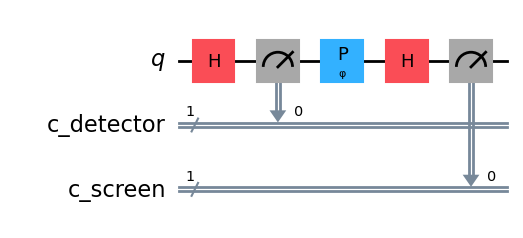

In [51]:
qr = QuantumRegister(1, name='q')
cr1 = ClassicalRegister(1, name='c_detector')
cr2 = ClassicalRegister(1, name='c_screen')
double_slit_with_detector = QuantumCircuit(qr, cr1, cr2)

φ = Parameter('φ')

#your code here

double_slit_with_detector.h(qr[0])
double_slit_with_detector.measure(qr[0], cr1[0])
double_slit_with_detector.p(φ, qr[0])
double_slit_with_detector.h(qr[0])
double_slit_with_detector.measure(qr[0], cr2[0])

#end of your code

double_slit_with_detector.draw('mpl')

In [52]:
grade_lab1_ex3(double_slit_with_detector)


Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


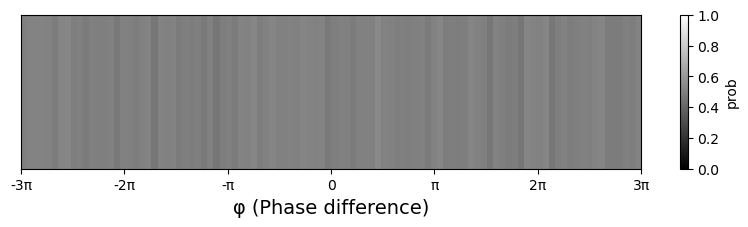

In [53]:
φ_lst = np.linspace(-3 * np.pi, 3 * np.pi, 100)
qc_isa = pm.run(double_slit_with_detector)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1], vmin=0, vmax=1)

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3 * np.pi, -2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi, 3 * np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])  
plt.show()

In [ ]:
def create_chsh_circuit(x, y):
    """Builds Qiskit circuit for Alice & Bob's quantum strategy."""
    qc = QuantumCircuit(2, 2, name=f'CHSH_{x}{y}') # 2 큐빗, 2 고전 비트

    # --- 과제 1 ---
    # 벨 상태 |Φ+> = (|00> + |11>)/sqrt(2) 를 만드는 게이트를 구현하세요.

    qc.h(0)
    qc.cx(0, 1)

    # --- 과제 1 종료 ---
    qc.barrier()
    # Step 2a: 앨리스의 측정 방향 (x=0 일 때 Z 방향, x=1 일 때 X 방향)
    if x == 1:
        qc.h(0) # H 게이트를 a가해 X 방향으로 회전

    ##  --- 과제 2 ---
    # Step 2b: 밥의 측정 방향

    if y == 0:
        qc.ry(-np.pi/4, 1)
    else:
        qc.ry(np.pi/4, 1)


    
    # --- 과제 2 종료 ---
    qc.barrier()
    
    # Step 3: 측정
    qc.measure([0, 1], [0, 1]) # q0 -> c0 (앨리스), q1 -> c1 (밥) // 'ba' 순서로 표시됨

    return qc

In [55]:
grade_lab1_ex4(create_chsh_circuit)


Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):


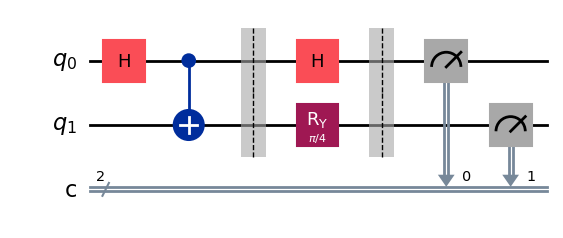

In [59]:
circuits = []
input_pairs = []
for x_in in [0, 1]:
    for y_in in [0, 1]:
        input_pairs.append((x_in, y_in))
        circuits.append(create_chsh_circuit(x_in, y_in))

print("Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):")
if len(circuits) == 4:
    display(circuits[3].draw('mpl')) # (x,y) = (1,1)
else:
    print("Circuits not generated. Run previous cell after completing Exercises 1 & 2.")

Preparing circuits for the simulator...

--- Simulation Results (Counts) ---
Inputs (x=0, y=0):
  Outcomes (ba): {'00': 402, '01': 72, '10': 75, '11': 475}
Inputs (x=0, y=1):
  Outcomes (ba): {'00': 432, '01': 72, '10': 93, '11': 427}
Inputs (x=1, y=0):
  Outcomes (ba): {'00': 449, '01': 77, '10': 71, '11': 427}
Inputs (x=1, y=1):
  Outcomes (ba): {'00': 72, '01': 420, '10': 444, '11': 88}

Plotting results...


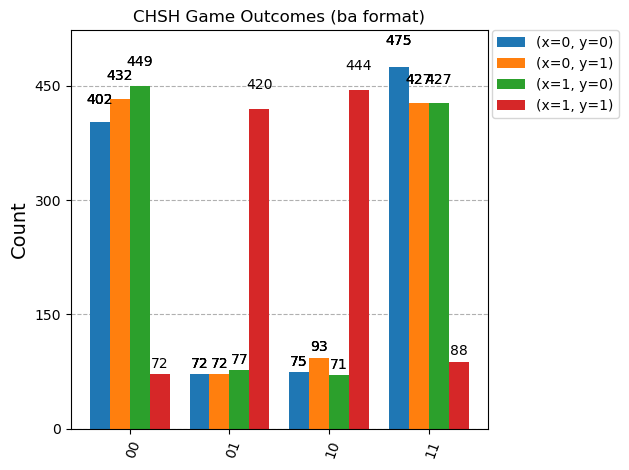

In [61]:
# AerSimulator (앞에서 정의하지 않은 경우)
# backend = AerSimulator()
# Pass manager (앞에서 정의하지 않은 경우)
# pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

SHOTS = 1024
print("Preparing circuits for the simulator...")
isa_qc_chsh = pm.run(circuits)

sampler_chsh = Sampler(mode=backend) # SamplerV2
job_chsh = sampler_chsh.run(isa_qc_chsh, shots=SHOTS)
results_chsh = job_chsh.result()

# SamplerV2: 고전 레지스터의 이름 기본값이 'c'일 때 results_chsh[i].data.c.get_counts()
counts_list = [results_chsh[i].data.c.get_counts() for i in range(len(circuits))]
print("\n--- Simulation Results (Counts) ---")
for i, (x, y) in enumerate(input_pairs):
    print(f"Inputs (x={x}, y={y}):")
    sorted_counts = dict(sorted(counts_list[i].items()))
    print(f"  Outcomes (ba): {sorted_counts}")

print("\nPlotting results...")
display(plot_histogram(counts_list,
                       legend=[f'(x={x}, y={y})' for x, y in input_pairs],
                       title='CHSH Game Outcomes (ba format)'))

In [63]:
win_probabilities = {}
print("--- Calculating Win Probabilities ---")

for i, (x, y) in enumerate(input_pairs):
    counts = counts_list[i]

    # --- 과제 1 ---
    # 승리를 위해 목표로 하는 (a XOR b) 값을 구해 변수 `target_xor_result`에 할당하세요.
    
    target_xor_result = x & y

    # --- 과제 1 종료 ---

    wins_for_this_case = 0

    # --- 과제 2 ---
    # 위에서 구한 승리 조건을 만족하는 측정 결과의 개수를 변수 `wins_for_this_case`로 카운트하세요.
    
    for outcome, count in counts.items():
        b = int(outcome[0])
        a = int(outcome[1])
        if (a^b) == target_xor_result:
            wins_for_this_case += count

    # --- 과제 2 종료 ---

    prob = wins_for_this_case / SHOTS if SHOTS > 0 else 0
    win_probabilities[(x, y)] = prob
    print(f"Inputs (x={x}, y={y}): Target (a XOR b) = {target_xor_result}. Win Probability = {prob:.4f}")

avg_win_prob = sum(win_probabilities.values()) / 4.0
P_win_quantum_theory = np.cos(np.pi / 8)**2  # ~0.8536
P_win_classical_limit = 0.75

print("\n--- Overall Performance ---")
print(f"Experimental Average Win Probability: {avg_win_prob:.4f}")
print(f"Theoretical Quantum Win Probability: {P_win_quantum_theory:.4f}")
print(f"Classical Limit Win Probability:     {P_win_classical_limit:.4f}")

if avg_win_prob > P_win_classical_limit + 0.01: # 약간의 시뮬레이션 편차를 허용합니다
    print(f"\nSuccess! Your result ({avg_win_prob:.4f}) clearly beats the classical 75% limit!")
    print(f"It's likely close to the theoretical quantum prediction of {P_win_quantum_theory:.4f}.")
elif avg_win_prob > P_win_classical_limit - 0.02 : # 노이즈나 가벼운 실수 때문일 수 있습니다
     print(f"\nClose, but no cigar? Your result ({avg_win_prob:.4f}) is around the classical limit ({P_win_classical_limit:.4f}).")
     print("Check your solutions for Exercises 1-4 carefully, especially the win counting logic in Ex 4.")
else:
    print(f"\nHmm, the result ({avg_win_prob:.4f}) is unexpectedly low, even below the classical limit.")
    print("There might be an error in Exercises 1-4. Please review your circuit and analysis code.")

--- Calculating Win Probabilities ---
Inputs (x=0, y=0): Target (a XOR b) = 0. Win Probability = 0.8564
Inputs (x=0, y=1): Target (a XOR b) = 0. Win Probability = 0.8389
Inputs (x=1, y=0): Target (a XOR b) = 0. Win Probability = 0.8555
Inputs (x=1, y=1): Target (a XOR b) = 1. Win Probability = 0.8438

--- Overall Performance ---
Experimental Average Win Probability: 0.8486
Theoretical Quantum Win Probability: 0.8536
Classical Limit Win Probability:     0.7500

Success! Your result (0.8486) clearly beats the classical 75% limit!
It's likely close to the theoretical quantum prediction of 0.8536.


In [64]:
grade_lab1_ex5(counts_list, avg_win_prob)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Full Teleportation Circuit (Check your Exercises 1, 2, 3):


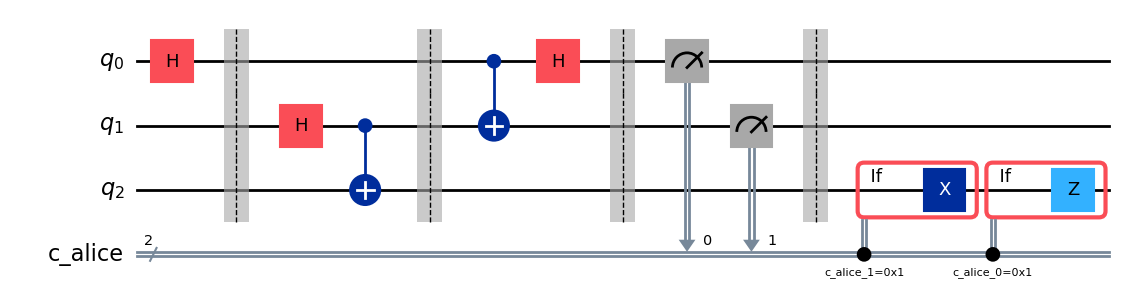

In [81]:
# 양자 레지스터와 고전 레지스터를 정의합니다
qr_tele = QuantumRegister(3, name='q')
cr_alice_tele = ClassicalRegister(2, name='c_alice') # 앨리스의 측정에 사용될 레지스터

# 마지막의 상태 벡터를 직접 확인하기 위해 이 회로에서 밥의 큐비트는 측정하지 않습니다.
# 만약 실제 하드웨어에서 실행하여 카운트를 확인해야 하는 경우에는 밥의 측정을 위한 비트도 추가해야 할 것입니다.
teleport_qc = QuantumCircuit(qr_tele, cr_alice_tele, name='Teleportation')

# q0에 앨리스의 메세지 상태 |ψ> = |+> 를 준비합니다
teleport_qc.h(qr_tele[0])
teleport_qc.barrier()

# --- 과제 1 ---
# Step 1: q1(앨리스)과 q2(밥)로 벨 큐빗을 만듭니다

teleport_qc.h(qr_tele[1])
teleport_qc.cx(qr_tele[1], qr_tele[2])

# --- 과제 1 종료 ---
teleport_qc.barrier()

# --- 과제 2 ---
# Step 2: 앨리스가 벨 측정을 수행합니다 (양자 게이트 부분만 구현해주세요)

teleport_qc.cx(qr_tele[0], qr_tele[1])
teleport_qc.h(qr_tele[0])

# --- 과제 2 종료 ---
teleport_qc.barrier()

# 앨리스가 q0와 q1 큐빗을 측정합니다
teleport_qc.measure(qr_tele[0], cr_alice_tele[0]) # q0 -> c0
teleport_qc.measure(qr_tele[1], cr_alice_tele[1]) # q1 -> c1
teleport_qc.barrier()

# --- 과제 3 ---
# Step 3: 밥이 q2에 조건부 게이트를 가합니다
# 중요: 이전 Qiskit 버전에서처럼 XGate()에 .c_if()를 추가하는 방법은 더 이상 작동하지 않습니다.
# Qiskit 1.0 이후 버전에서 권장하는 방법은 새로운 `if_test` 컨택스트 매니저를 사용하는 것입니다.

with teleport_qc.if_test((cr_alice_tele[1], 1)) as else_:
    teleport_qc.x(qr_tele[2])
with teleport_qc.if_test((cr_alice_tele[0], 1)) as else_:
    teleport_qc.z(qr_tele[2])

                

# --- 과제 3 종료 ---

print("Full Teleportation Circuit (Check your Exercises 1, 2, 3):")
display(teleport_qc.draw('mpl'))

In [82]:
grade_lab1_ex6(teleport_qc)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Using statevector simulator...
Running statevector simulation...
Simulation successful.
Statevector retrieved successfully.

Visualizing final qubit states (q2 should match initial q0 state |+>):


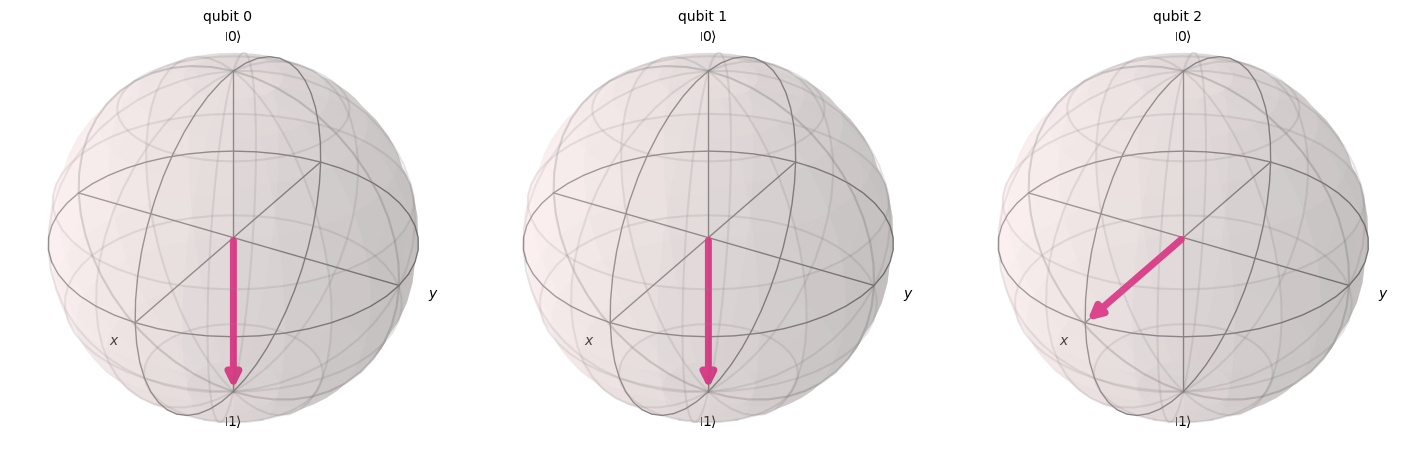

In [78]:
from qiskit.visualization import plot_bloch_multivector

# Statevector 시뮬레이터를 사용합니다
print("Using statevector simulator...")
sv_simulator = AerSimulator(method='statevector') # 명확한 구분을 위해 method를 지정하였습니다
teleport_qc_sv = teleport_qc.copy() # 상태벡터 시뮬레이션을 위해 회로를 복사합니다
teleport_qc_sv.save_statevector() # 마지막의 상태벡터를 저장합니다

print("Running statevector simulation...")
job_sv = sv_simulator.run(teleport_qc_sv) # 상태벡터 시뮬레이션에서는 기본 실행 횟수가 1회 입니다
result_sv = job_sv.result()

if result_sv.success:
    print("Simulation successful.")
    final_statevector = result_sv.get_statevector()
    print("Statevector retrieved successfully.")
    print("\nVisualizing final qubit states (q2 should match initial q0 state |+>):")
    # q0는 |+> 상태에 있었습니다 (+X 방향 벡터). 텔레포트 이후, q2도 |+> 상태에 있어야 합니다.
    # q0 와 q1 의 상태는 앨리스가 관측하였으므로 붕괴된 상태일 것입니다.
    
    display(plot_bloch_multivector(final_statevector)) # "TODO" 부분을 지우고 plot_bloch_multivector 함수로 final_statevector를 출력하세요
        
else:
    print(f"Statevector simulation failed! Status: {result_sv.status}")

In [83]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 1932 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ✅ 1256 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 549 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 85 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab
Functions Labs: 0/8 exercises completed (0%)
    ✅ 0 participants have completed this lab
